# Baseline and clinical characteristics
1 NMF subgroup stack plots 2 MM mutation co-occurence 3 Validation of prognostics 4 Staging stack plots 5 Table 1 info

In [1]:
intoMM<-read.table('IntOGen-DriverGenes_MM.tsv',header=T, sep="\t") #ok
NMCHIP<-read.csv('NMCHIP.csv',header=T)
MCHIP<-NMCHIP[which(NMCHIP$CH.category=='M-CHIP'),]
LCHIP<-NMCHIP[which(NMCHIP$CH.category=='L-CHIP'),]
allmut<-unique(c(intoMM$Symbol,NMCHIP$Gene))

In [2]:
library(openxlsx)
MMgroups<-read.xlsx('Table S3-re.xlsx', sheet = 1, startRow = 1, colNames = TRUE, rowNames = FALSE)
ALgroups<-read.xlsx('Table S4-re.xlsx', sheet = 1, startRow = 1, colNames = TRUE, rowNames = FALSE)
POEMSgroups<-read.xlsx('Table S5-re.xlsx', sheet = 1, startRow = 1, colNames = TRUE, rowNames = FALSE)

In [3]:
list<-read.csv('PCDalllist-wxz0513.csv',header=T)
rownames(list)<-list$newID
meta<-list
metaMM<-list[which(list$diagnosis=='MM'),]
metaAL<-list[which(list$diagnosis=='AL'),]
metaPOEMS<-list[which(list$diagnosis=='POEMS'),]
metaMGUS<-list[which(list$diagnosis=='MGUS'),]

In [4]:
nmf<-read.delim( "./downsampling/H_bnmf_k6_4.tsv" )
rownames(nmf)<-nmf$X
nmf<-cbind(nmf,list[nmf$X,])
stack<-as.data.frame(table(nmf[,c('diagnosis','max_id')]))

In [5]:
stackMM<-stack[which(stack$diagnosis=='MM'),]
stackMM$Freq<-stackMM$Freq/163
stackAL<-stack[which(stack$diagnosis=='AL'),]
stackAL$Freq<-stackAL$Freq/121
stackPOEMS<-stack[which(stack$diagnosis=='POEMS'),]
stackPOEMS$Freq<-stackPOEMS$Freq/67
stackMGUS<-stack[which(stack$diagnosis=='MGUS'),]
stackMGUS$Freq<-stackMGUS$Freq/13
stack<-rbind(stackMM,stackAL,stackPOEMS,stackMGUS)

In [6]:
stack

,diagnosis,max_id,Freq
,<fct>,<fct>,<dbl>
3,MM,0,0.1595092
7,MM,1,0.2883436
11,MM,2,0.2453988
15,MM,3,0.3067485
1,AL,0,0.2892562
5,AL,1,0.2727273
9,AL,2,0.2644628
13,AL,3,0.1735537
4,POEMS,0,0.3283582


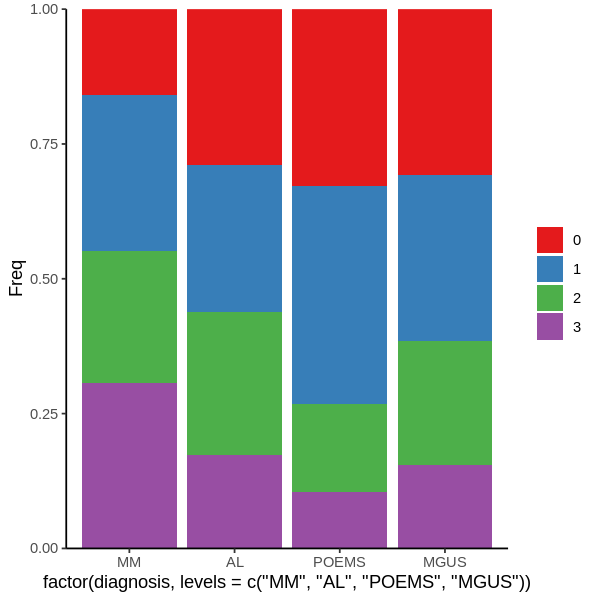

In [7]:
library(ggplot2)
library(RColorBrewer)
options(repr.plot.height=5,repr.plot.width=5)
ggplot(stack, aes(x=factor(diagnosis,levels=c('MM','AL','POEMS','MGUS')),y=Freq,fill=factor(max_id,levels=c('0','1','2','3')))) +
 geom_bar(stat="identity") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Set1")+
  theme_classic()+
theme(legend.position = "right")+
 guides(fill=guide_legend(title=NULL))
ggsave(filename="Stack.pdf",height=5,width=5)

In [8]:
rownames(MMgroups)<-MMgroups$newID
rownames(ALgroups)<-ALgroups$newID
rownames(POEMSgroups)<-POEMSgroups$newID
MMgroups<-MMgroups[metaMM$newID,]
ALgroups<-ALgroups[metaAL$newID,]
POEMSgroups<-POEMSgroups[metaPOEMS$newID,]

In [9]:
MMgroups2<-MMgroups[,c('ifish1q21%','ifish17p%','ifisht1114%','ifisht414%')]
colnames(MMgroups2)<-c('ifish1q21','ifish17p','ifisht1114','ifisht414')

MMgroups2$ifish1q21[which(MMgroups2$ifish1q21>20)]<-1
MMgroups2$ifish17p[which(MMgroups2$ifish17p>20)]<-1
MMgroups2$ifisht1114[which(MMgroups2$ifisht1114>10)]<-1
MMgroups2$ifisht414[which(MMgroups2$ifisht414>10)]<-1

MMgroups2$ifish1q21[which(MMgroups2$ifish1q21!=1)]<-0
MMgroups2$ifish17p[which(MMgroups2$ifish17p!=1)]<-0
MMgroups2$ifisht1114[which(MMgroups2$ifisht1114!=1)]<-0
MMgroups2$ifisht414[which(MMgroups2$ifisht414!=1)]<-0

MMgroups2$ifish1q21[is.na(MMgroups2$ifish1q21)]<-0
MMgroups2$ifish17p[is.na(MMgroups2$ifish17p)]<-0
MMgroups2$ifisht1114[is.na(MMgroups2$ifisht1114)]<-0
MMgroups2$ifisht414[is.na(MMgroups2$ifisht414)]<-0

write.csv(MMgroups2,file='1207-MMifish.csv')

In [10]:
rownames(ALgroups)<-ALgroups$newID
ALgroups2<-as.data.frame(ALgroups[,'ifisht1114%'])
colnames(ALgroups2)<-'ifisht1114'
rownames(ALgroups2)<-rownames(ALgroups)

ALgroups2$ifisht1114[which(ALgroups2$ifisht1114>10)]<-1
ALgroups2$ifisht1114[which(ALgroups2$ifisht1114!=1)]<-0
ALgroups2$ifisht1114[is.na(ALgroups2$ifisht1114)]<-0

write.csv(ALgroups2,file='1207-ALifish.csv')

MMgroups<-cbind(MMgroups,MMgroups2)
ALgroups<-cbind(ALgroups,ALgroups2)
colnames(ALgroups)[dim(ALgroups)[2]]<-'ifisht1114'

In [11]:
expr_df<-read.csv('0429-cleangene-together-bi.csv')
rownames(expr_df)<-expr_df$X
expr_df$X<-NULL
expr_df<-expr_df[,intersect(colnames(expr_df),metaMM$newID)]
expr_df<-expr_df[c('TP53','CCND1','FGFR3','DIS3','NRAS','KRAS'),]
expr_df<-as.data.frame(t(expr_df))

In [12]:
all2<-cbind(MMgroups2[rownames(expr_df),],expr_df)

In [13]:
combos <- expand.grid(rep(list(1:ncol(all2)), 2 )) # combinations with repetitions
combos <- as.matrix(combos)
combos <- t(combos) # transpose matrix

library(plyr)
mat1 <- adply(combos, 2, function(x) {
test <- fisher.test(all2[, x[1]], all2[, x[2]])
.Table <- xtabs(~all2[, x[1]] + all2[, x[2]], data=all2)
Odds.r <- (.Table[1]/.Table[3])/(.Table[2]/.Table[4])
out <- data.frame("Row" = colnames(all2)[x[1]]
, "Column" = colnames(all2[x[2]])
, "p.value" = round(test$p.value, 3)
, "OR" = Odds.r
)
return(out)
})

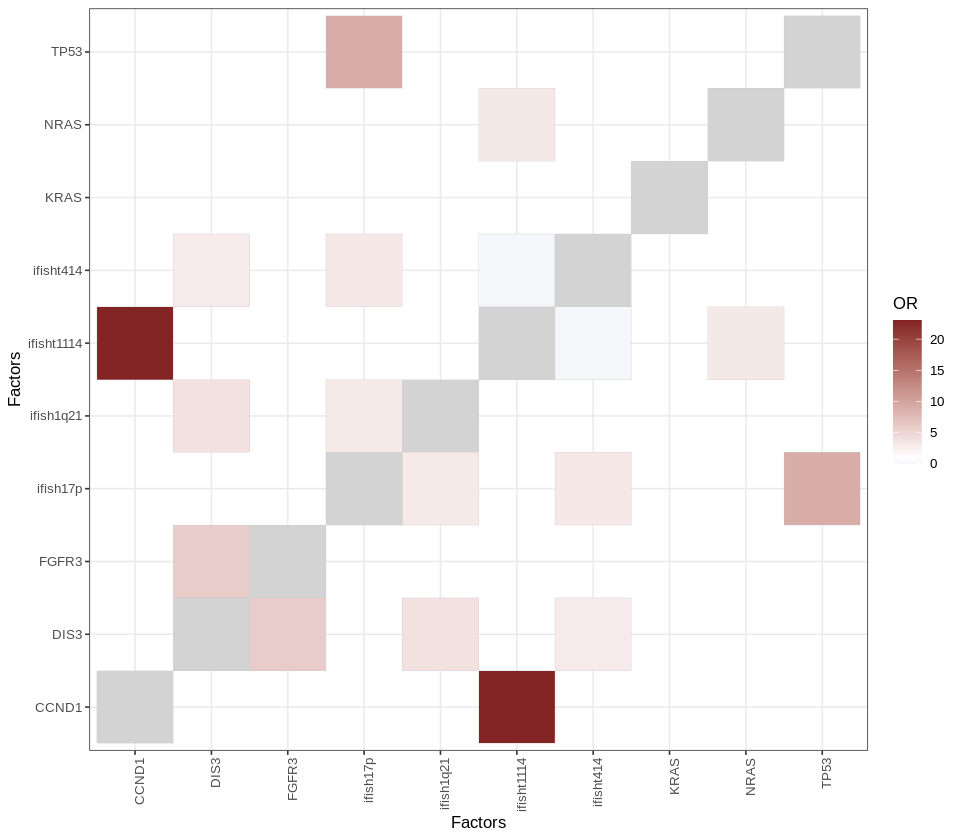

In [14]:
library(scales)
library(ggplot2)
options(repr.plot.height=7,repr.plot.width=8)
mat2<-mat1[which(mat1$p.value<0.05),]  
q <- ggplot(mat2, aes(Row, Column, fill =OR)) +
geom_tile(colour="gray80") +
theme_bw(10) +
xlab("Factors") + ylab("Factors") +
scale_fill_gradient2(low = muted("steelblue"), mid = "white", high = muted("firebrick"),
midpoint = 1, space = "Lab", na.value = "lightgrey", guide = "colourbar")
q + theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [15]:
pdf(file="occur.pdf",height=7,width=8)
q + theme(axis.text.x = element_text(angle = 90, hjust = 1))
dev.off()

png 
  2

In [16]:
nmf<-read.delim( "./downsampling/H_bnmf_k6_4.tsv" )
rownames(nmf)<-nmf$X
nmf$'max_id'<-paste('c',nmf$'max_id',sep='')

nmf2<-nmf[rownames(MMgroups2),]
all2<-cbind(MMgroups2,nmf2)
all2<-all2[,c(1:4,11)]
all2$c1<-gsub('c1','1',all2$'max_id')
all2$c1<-gsub('c2','0',all2$'c1')
all2$c1<-gsub('c3','0',all2$'c1')
all2$c1<-gsub('c0','0',all2$'c1')

all2$c2<-gsub('c2','1',all2$'max_id')
all2$c2<-gsub('c1','0',all2$'c2')
all2$c2<-gsub('c3','0',all2$'c2')
all2$c2<-gsub('c0','0',all2$'c2')

all2$c3<-gsub('c3','1',all2$'max_id')
all2$c3<-gsub('c2','0',all2$'c3')
all2$c3<-gsub('c1','0',all2$'c3')
all2$c3<-gsub('c0','0',all2$'c3')

all2$c0<-gsub('c0','1',all2$'max_id')
all2$c0<-gsub('c2','0',all2$'c0')
all2$c0<-gsub('c3','0',all2$'c0')
all2$c0<-gsub('c1','0',all2$'c0')

all2$'max_id'<-NULL

all2$c0<-as.numeric(all2$c0)
all2$c1<-as.numeric(all2$c1)
all2$c2<-as.numeric(all2$c2)
all2$c3<-as.numeric(all2$c3)

png 
  2

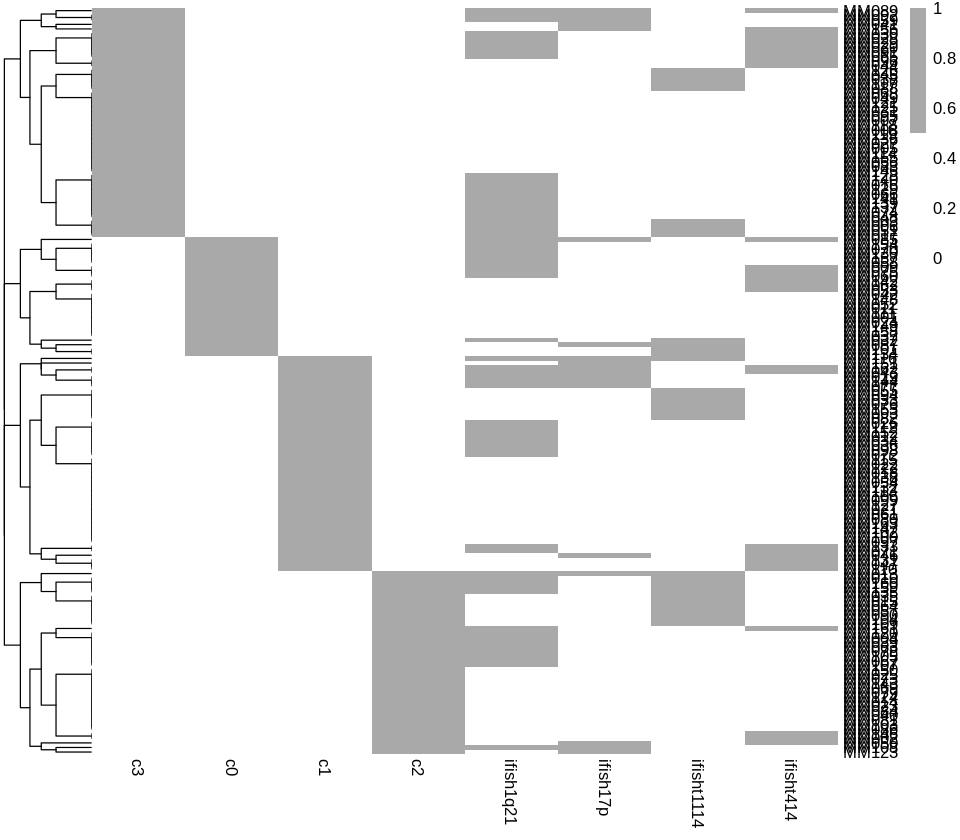

In [17]:
library(pheatmap)
save_pheatmap_pdf <- function(x, filename, width=10, height=4) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
p<-pheatmap(all2[,c('c3','c0','c1','c2','ifish1q21','ifish17p','ifisht1114','ifisht414')],col=c('white','darkgrey'),cluster_col = FALSE,border=F)
save_pheatmap_pdf(p, "test.pdf")

In [18]:
library(survival)
library(survminer)
source('survplotPCD.R')

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




Warning message in survplotPCD(data = MMgroups, status = "Survival", time = "OS.calc", :
“NAs introduced by coercion”


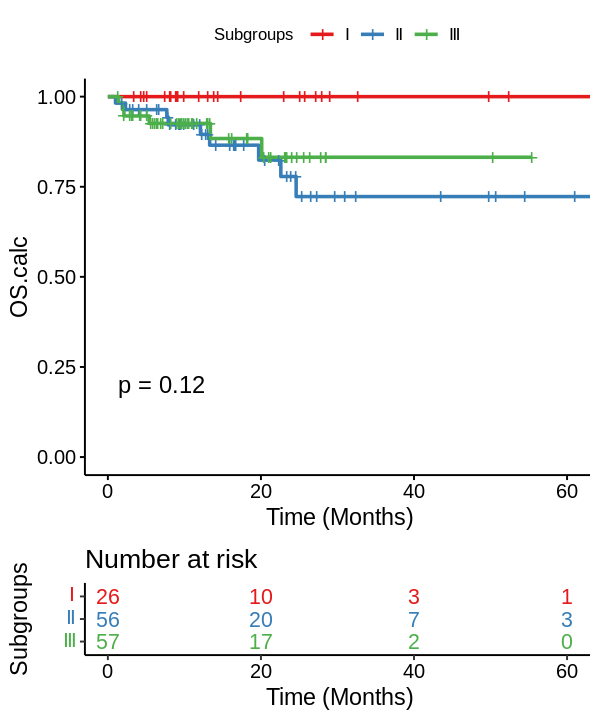

In [19]:
suppressMessages(p<-survplotPCD(data=MMgroups,status='Survival',
                             time='OS.calc',negative='Alive',positive='Died',
                             group='ISS',labels=c('Ⅰ', 'Ⅱ' ,'Ⅲ' )))
p

In [20]:
pdf(file="ISS.pdf",height=6,width=5)
p
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

png 
  2

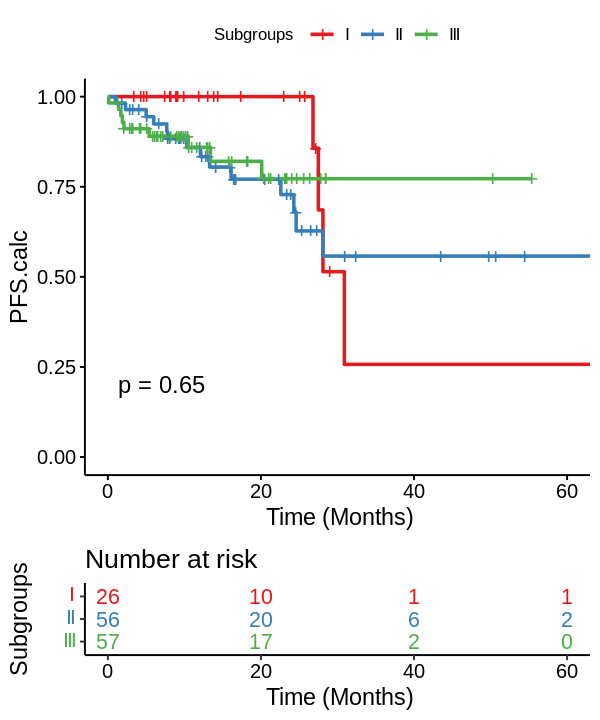

In [21]:
suppressMessages(p<-survplotPCD(data=MMgroups,status='Relapse',
                             time='PFS.calc',negative='No',positive='Yes',
                             group='ISS',labels=c('Ⅰ', 'Ⅱ' ,'Ⅲ' )))
p

Warning message in survplotPCD(data = ALgroups, status = "Survival", time = "OS.calc.diagnose", :
“NAs introduced by coercion”


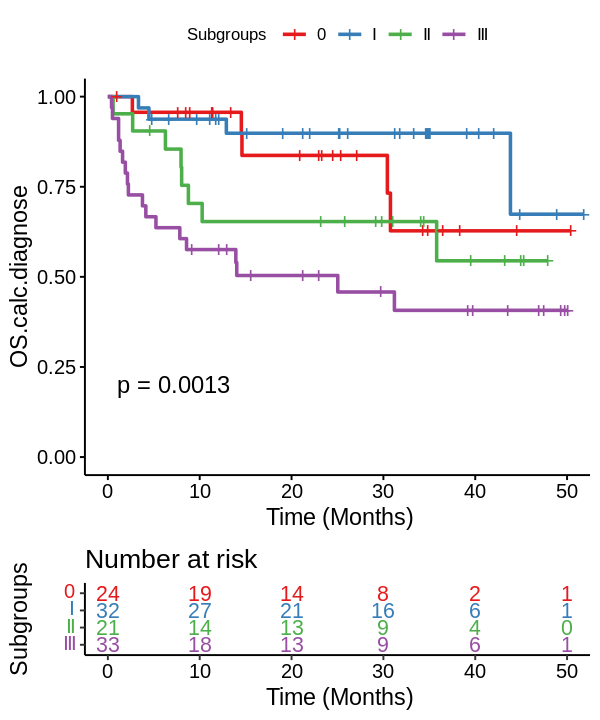

In [22]:
suppressMessages(p<-survplotPCD(data=ALgroups,status='Survival',
                             time='OS.calc.diagnose',negative='Alive',positive='Died',
                             group='Mayo.12',labels=c('0' ,'Ⅰ', 'Ⅱ' ,'Ⅲ' )))
p

In [23]:
pdf(file="mayo12.pdf",height=6,width=5)
p
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

png 
  2

Warning message in survplotPCD(data = ALgroups, status = "Relapse", time = "PFS.calc.diagnose", :
“NAs introduced by coercion”


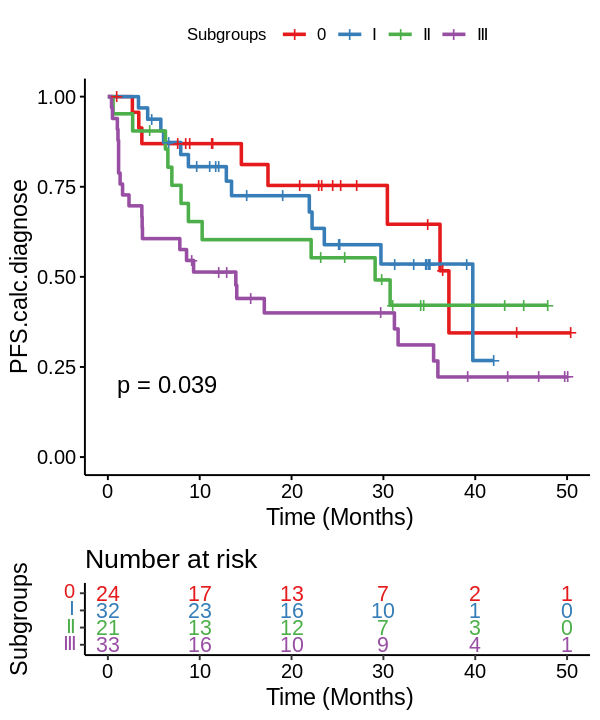

In [24]:
suppressMessages(p<-survplotPCD(data=ALgroups,status='Relapse',
                             time='PFS.calc.diagnose',negative='No',positive='Yes',
                             group='Mayo.12',labels=c('0' ,'Ⅰ', 'Ⅱ' ,'Ⅲ' )))
p

Warning message in survplotPCD(data = ALgroups, status = "Survival", time = "OS.calc.diagnose", :
“NAs introduced by coercion”


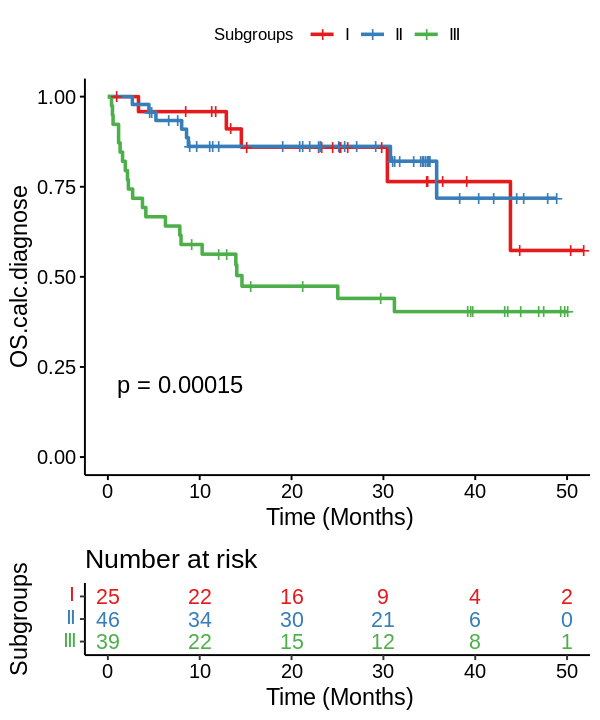

In [25]:
suppressMessages(p<-survplotPCD(data=ALgroups,status='Survival',
                             time='OS.calc.diagnose',negative='Alive',positive='Died',
                             group='Mayo.04',labels=c('Ⅰ', 'Ⅱ' ,'Ⅲ' )))
p

In [26]:
pdf(file="mayo04.pdf",height=6,width=5)
p
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

png 
  2

Warning message in survplotPCD(data = ALgroups, status = "Relapse", time = "PFS.calc.diagnose", :
“NAs introduced by coercion”


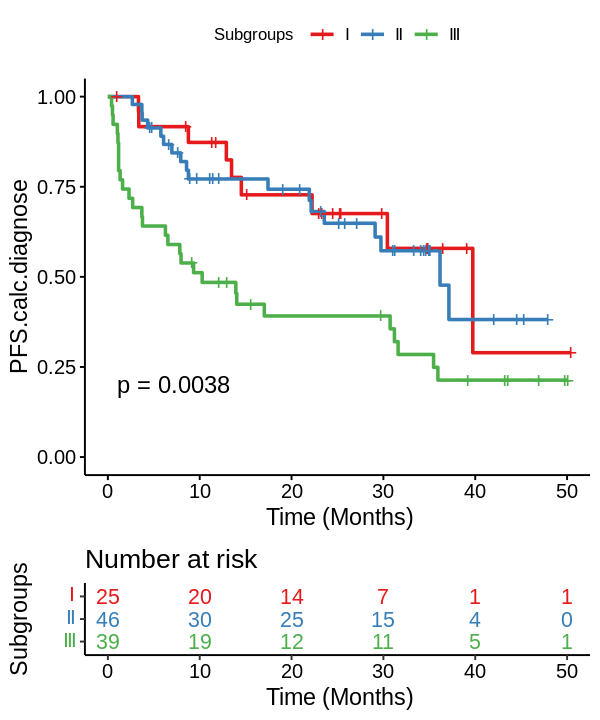

In [27]:
suppressMessages(p<-survplotPCD(data=ALgroups,status='Relapse',
                             time='PFS.calc.diagnose',negative='No',positive='Yes',
                             group='Mayo.04',labels=c('Ⅰ', 'Ⅱ' ,'Ⅲ' )))
p

Warning message in survplotPCD(data = ALgroups, status = "Survival", time = "OS.calc.diagnose", :
“NAs introduced by coercion”


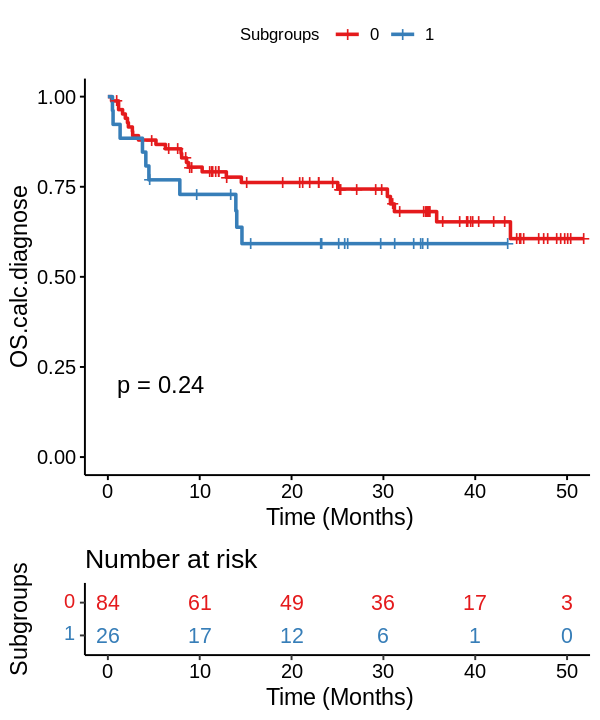

In [28]:
suppressMessages(p<-survplotPCD(data=ALgroups,status='Survival',
                             time='OS.calc.diagnose',negative='Alive',positive='Died',
                             group='ifisht1114',labels=c('0', '1'  )))
p

In [29]:
pdf(file="1114AL.pdf",height=6,width=5)
p
dev.off()

png 
  2

In [30]:
nmf<-read.delim( "./downsampling/H_bnmf_k6_4.tsv" )
rownames(nmf)<-nmf$X
nmf$'max_id'<-paste('c',nmf$'max_id',sep='')

nmf2<-nmf[rownames(MMgroups),]
MMgroups<-cbind(MMgroups,nmf2)

nmf2<-nmf[rownames(ALgroups),]
ALgroups<-cbind(ALgroups,nmf2)

In [31]:
MMstack<-as.data.frame(table(MMgroups[,c('ISS','max_id')]))
ALstack<-as.data.frame(table(ALgroups[,c('Mayo.12','max_id')]))

c0<-MMstack[which(MMstack$'max_id'=='c0'),]
c1<-MMstack[which(MMstack$'max_id'=='c1'),]
c2<-MMstack[which(MMstack$'max_id'=='c2'),]
c3<-MMstack[which(MMstack$'max_id'=='c3'),]
c0$Freq<-c0$Freq/sum(c0$Freq)
c1$Freq<-c1$Freq/sum(c1$Freq)
c2$Freq<-c2$Freq/sum(c2$Freq)
c3$Freq<-c3$Freq/sum(c3$Freq)
MMstackbd<-rbind(c0,c1,c2,c3)

In [32]:
MMstackbd

,ISS,max_id,Freq
,<fct>,<fct>,<dbl>
1,Ⅰ,c0,0.07692308
2,Ⅱ,c0,0.42307692
3,Ⅲ,c0,0.50000000
4,Ⅰ,c1,0.19148936
5,Ⅱ,c1,0.40425532
6,Ⅲ,c1,0.40425532
7,Ⅰ,c2,0.35000000
8,Ⅱ,c2,0.25000000
9,Ⅲ,c2,0.40000000


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

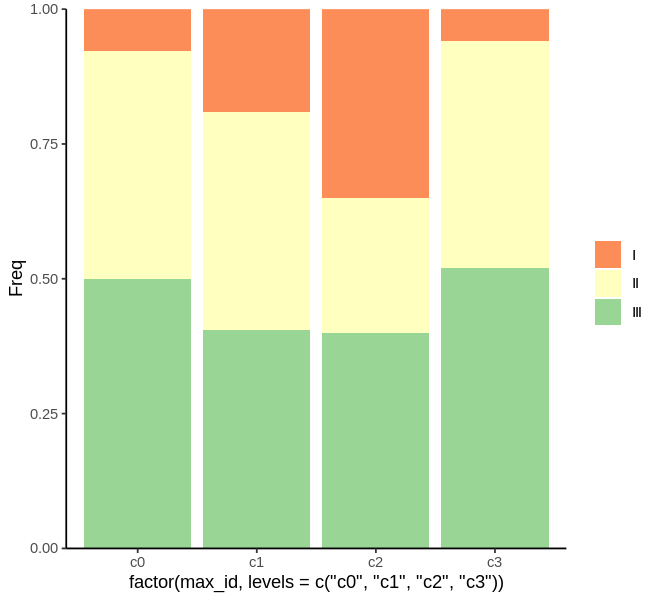

In [33]:
library(ggplot2)
options(repr.plot.height=5,repr.plot.width=5.5)
ggplot(MMstackbd, aes(x=factor(max_id,levels=c('c0','c1','c2','c3')),y=Freq,fill=ISS)) +
  geom_bar(stat="identity") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Spectral")+
  theme_classic()+
theme(legend.position = "right")+
 guides(fill=guide_legend(title=NULL))
ggsave(filename="ISSstack.pdf",height=5,width=5.5)

In [34]:
c0<-ALstack[which(ALstack$'max_id'=='c0'),]
c1<-ALstack[which(ALstack$'max_id'=='c1'),]
c2<-ALstack[which(ALstack$'max_id'=='c2'),]
c3<-ALstack[which(ALstack$'max_id'=='c3'),]
c0$Freq<-c0$Freq/sum(c0$Freq)
c1$Freq<-c1$Freq/sum(c1$Freq)
c2$Freq<-c2$Freq/sum(c2$Freq)
c3$Freq<-c3$Freq/sum(c3$Freq)
ALstackbd<-rbind(c0,c1,c2,c3)

In [35]:
ALstackbd

,Mayo.12,max_id,Freq
,<fct>,<fct>,<dbl>
1,0,c0,0.2285714
2,Ⅰ,c0,0.2000000
3,Ⅱ,c0,0.1714286
4,Ⅲ,c0,0.4000000
5,0,c1,0.2727273
6,Ⅰ,c1,0.3333333
7,Ⅱ,c1,0.2424242
8,Ⅲ,c1,0.1515152
9,0,c2,0.2187500


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <85>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Ⅰ' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

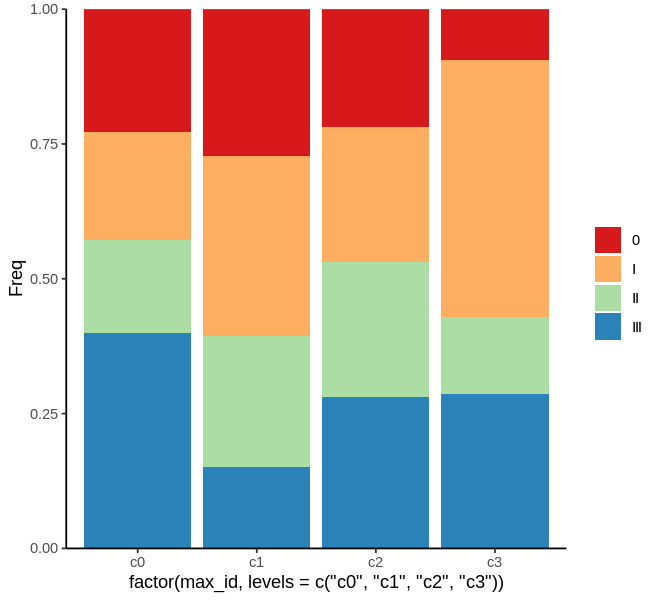

In [36]:
library(ggplot2)
options(repr.plot.height=5,repr.plot.width=5.5)
ggplot(ALstackbd, aes(x=factor(max_id,levels=c('c0','c1','c2','c3')),y=Freq,fill=Mayo.12)) +
  geom_bar(stat="identity") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Spectral")+
  theme_classic()+
theme(legend.position = "right")+
 guides(fill=guide_legend(title=NULL))
ggsave(filename="Mayostack.pdf",height=5,width=5.5)

In [37]:
summary(MMgroups)
table(MMgroups$Gender)
table(MMgroups$ISS)

    newID                ID                 Age         Diagnosis        
 Length:163         Length:163         Min.   :38.00   Length:163        
 Class :character   Class :character   1st Qu.:55.00   Class :character  
 Mode  :character   Mode  :character   Median :62.00   Mode  :character  
                                       Mean   :60.61                     
                                       3rd Qu.:67.00                     
                                       Max.   :82.00                     
                                                                         
    Gender               DS               Beta2MG           ISS           
 Length:163         Length:163         Min.   : 0.190   Length:163        
 Class :character   Class :character   1st Qu.: 3.300   Class :character  
 Mode  :character   Mode  :character   Median : 5.300   Mode  :character  
                                       Mean   : 8.218                     
                                 


female   male 
    71     92 


 Ⅰ  Ⅱ  Ⅲ 
28 61 74 

In [38]:
summary(ALgroups)
table(ALgroups$Gender)
table(ALgroups$Mayo.12)

    newID                ID             Diagnosis            Gender         
 Length:121         Length:121         Length:121         Length:121        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
      Age          Mayo.04            Mayo.12              BMPC%       
 Min.   :39.00   Length:121         Length:121         Min.   : 0.500  
 1st Qu.:54.00   Class :character   Class :character   1st Qu.: 2.500  
 Median :60.00   Mode  :character   Mode  :character   Median : 4.500  
 Mean   :59.25                                         Mean   : 6.166  
 3rd Qu.:64.00          


female   male 
    44     77 


 0  Ⅰ  Ⅱ  Ⅲ 
26 36 25 34 

In [39]:
summary(POEMSgroups)
table(POEMSgroups$Gender)

    newID                ID               Gender           Diagnosis        
 Length:67          Length:67          Length:67          Length:67         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
      Age            VEGF           IFE              SPEP(g/L)     
 Min.   :27.0   Min.   :  200   Length:67          Min.   : 0.000  
 1st Qu.:44.0   1st Qu.: 2563   Class :character   1st Qu.: 0.000  
 Median :49.0   Median : 4225   Mode  :character   Median : 1.400  
 Mean   :49.9   Mean   : 4909                      Mean   : 2.241  
 3rd Qu.:56.0   3rd Qu.: 6878               


female   male 
    35     32 

In [40]:
MGUSgroups<-read.csv('0108-MGUSgroups.csv')

In [41]:
summary(MGUSgroups)
table(MGUSgroups$sex)

     name               sex                 age           onset          
 Length:13          Length:13          Min.   :43.00   Length:13         
 Class :character   Class :character   1st Qu.:61.00   Class :character  
 Mode  :character   Mode  :character   Median :65.00   Mode  :character  
                                       Mean   :64.62                     
                                       3rd Qu.:68.00                     
                                       Max.   :85.00                     
                                                                         
  diagnosis              LDH           Mprotein          SPEP          
 Length:13          Min.   :160.0   Min.   : 0.600   Length:13         
 Class :character   1st Qu.:176.5   1st Qu.: 3.700   Class :character  
 Mode  :character   Median :197.0   Median : 6.800   Mode  :character  
                    Mean   :204.9   Mean   : 8.361                     
                    3rd Qu.:221.5   3rd Qu.:10.3


女 男 
 6  7 